In [1]:
%load_ext autoreload
%autoreload 2

SystemExit: 

C:\Users\arizona95\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3445: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


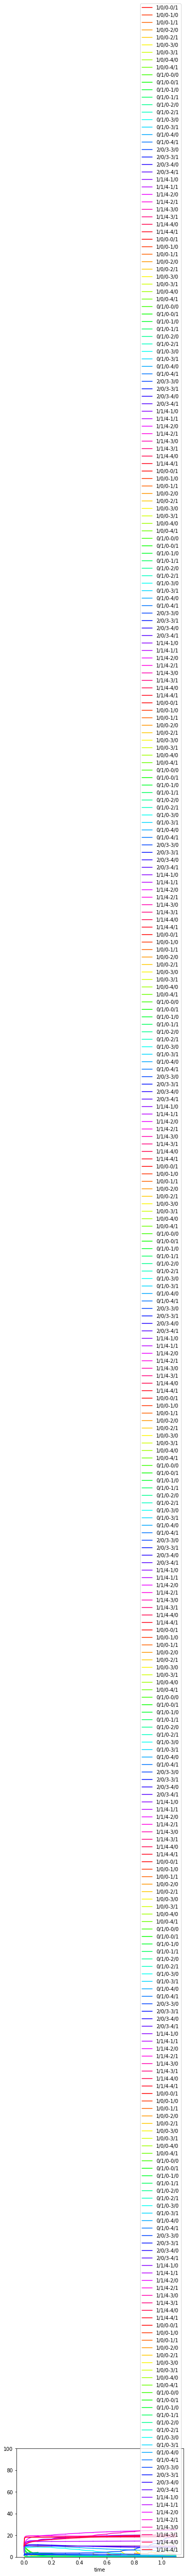

In [5]:
import os
import gym
import neat
from evaluator import Evaluator
from datetime import datetime
from tf_neat.recurrent_net import RecurrentNet

param = {
    "g_s":3,
    "s_s":2,
    "max_state":5,
    "react_depth":1,
    "neuron_num":5,
    "input_num":4,
    "output_num":1
}

s = datetime.now().strftime('%Y-%m-%d-%Hh-%Mm-%Ss')
rootPath = f"generations\{s}"

if not os.path.exists(rootPath):
    os.makedirs(rootPath)
    


def make_env():
    return gym.make("CartPole-v0")


def make_net(genome, config, bs):
    return RecurrentNet.create(genome, config, bs)

def run(n_generations):
    config_path = os.path.join(os.path.dirname(os.path.abspath('')), "lab/neat.cfg")
    config = neat.Config(
        neat.DefaultGenome,
        neat.DefaultReproduction,
        neat.DefaultSpeciesSet,
        neat.DefaultStagnation,
        config_path,
    )

    evaluator = Evaluator(
        make_net, make_env=make_env, param=param
    )

    def eval_genomes(genomes, config):
        for idx, genome in genomes:
            genome.fitness = evaluator.eval_genome(genome, config, idx, rootPath = rootPath)

    pop = neat.Population(config)
    pop.run(eval_genomes, n_generations)

run(10)

In [ ]:
import gym

env = gym.make('CartPole-v1')

# 새로운 에피소드 시작
env.reset()

# 게임 환경에서 선택할 수 있는 행동
action = env.action_space.sample()
action

In [ ]:
env.action_space

In [ ]:
a = np.array([1,2,3,4,5,6])
c,d = a.reshape(2,-1)

In [ ]:
c

In [ ]:
import pandas as pd
dict_a = {"a":{"s1":1, "s2":2}, "b":{"s3":3}}
a = pd.DataFrame.from_dict(dict_a).T

In [ ]:
import numpy as np
from simulator import Simulator
np.set_printoptions(precision=6, suppress=True)
time = "2022-04-26-15h-23m-23s"
idx = 1
filepath = f"generations\\{time}\\{str(idx)}"
simulator = Simulator.by_file(filepath)


#input_vector = np.array([15,1,2,3])
#simulator.input(input_vector)

simulator.run(0.0000000000000000000001)
simulator.show()


In [ ]:
np.log(simulator.model['x_0']+1).T

In [ ]:
simulator.model['a'].T

In [ ]:
## np.dot(self.x.T, self.V) +\
## np.dot(self.q, np.dot(1 / (self.D + 1) - 1, self.q.T))

q = np.dot(np.diag(np.dot(simulator.model['M'], simulator.model['q_c']).T[0]), simulator.model['S'])
V = np.dot(q, np.dot(1/(simulator.model['D']+1)-1 ,q.T))

np.dot(q.T, simulator.model['M_'])[0].shape

#np.dot(simulator.model['M'].T, simulator.model['M_'])


In [ ]:
simulator.model

In [ ]:
print(simulator.model['M'].shape)
print(simulator.model['q_c'].shape)
print(simulator.model['S'].shape)
print(q.shape)

In [ ]:
type(simulator.model_dict['M_'])

In [ ]:
np.dot(q.T, simulator.model['M_'])[:,0]

In [ ]:
q.shape

In [ ]:
2.71**813.911757

In [ ]:
simulator.history["xp"][:1]

In [ ]:
from system import System
system = System(simulator.model)

In [ ]:
system.energy()

In [ ]:
np.set_printoptions(precision=6, suppress=True)
system.flow()